## Copernicus data using the package Sentinelsat

https://sentinelsat.readthedocs.io/en/stable/

The reference for Global Navigation Satellite Systems

https://gssc.esa.int/navipedia/index.php/Main_Page

In [2]:
from sentinelsat import SentinelAPI

user = ''
password = ''
#First we initiate the API interface
api = SentinelAPI(user, password, 'https://apihub.copernicus.eu/apihub')

In [138]:
# To download a product all we have to do is provide its ID

#If we want to reduce the amount of data downloaded, we can exclude nodes:
from sentinelsat import make_path_filter

nodefilter = make_path_filter('*<the node to exclude>/*', exclude=True)

api.download('659851c9-6b5e-483f-97aa-972c3823abe2',nodefilter=nodefilter)
#This saves the product into the same directory, this can be interrupted without loss of progress

{'id': '659851c9-6b5e-483f-97aa-972c3823abe2',
 'title': 'S1B_IW_GRDH_1SDV_20211004T170346_20211004T170411_028988_037598_E3A6',
 'size': 867511586,
 'md5': 'ad482ebb8f8ef7a81e185919953d6948',
 'date': datetime.datetime(2021, 10, 4, 17, 3, 46, 553000),
 'footprint': 'POLYGON((21.103437 -22.724472,23.553726 -22.145626,23.970881 -23.639910,21.495274 -24.226313,21.103437 -22.724472))',
 'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('659851c9-6b5e-483f-97aa-972c3823abe2')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 10, 5, 10, 32, 1, 558000),
 'Ingestion Date': datetime.datetime(2021, 10, 5, 10, 30, 13, 213000),
 'quicklook_url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('659851c9-6b5e-483f-97aa-972c3823abe2')/Products('Quicklook')/$value",
 'path': 'S1B_IW_GRDH_1SDV_20211004T170346_20211004T170411_028988_037598_E3A6.zip',
 'downloaded_bytes': 224734498}

With this package we can also make querries for specific products, the options are the same as in the standard API interaction and can be found here: https://scihub.copernicus.eu/twiki/do/view/SciHubUserGuide/FullTextSearch?redirectedfrom=SciHubUserGuide.3FullTextSearch


In [34]:
# To make coordinate based searches we can use the geojson standard and read it using:
from sentinelsat import read_geojson, geojson_to_wkt
from datetime import date

# The formating is somewhat self explanatory, its best to play a bit with https://geojson.io/ to understand how it works
# An example encapsulating the netherlands with 4 straight lines would be:
geojson = {
            "type": "FeatureCollection",
            "features": [
                            {
                            "type": "Feature",
                            "properties": {},
                            "geometry": {
                                "type": "LineString",
                                "coordinates": [
                                [
                                    5.921630859375,
                                    51.09662294502995
                                ],
                                [
                                    7.294921874999999,
                                    53.29805557491275
                                ],
                                [
                                    5.42724609375,
                                    53.66417110963306
                                ],
                                [
                                    2.98828125,
                                    51.39235087498254
                                ],
                                [
                                    5.9209442138671875,
                                    51.093819933267405
                                ]
                                ]
                            }
                            }
                        ]
            }
#You can also get more sophisticated country selection using tools like this: https://geojson-maps.ash.ms/ 
geojson = read_geojson('./geo_nl.json')


#With read_geojson we can load this data from a file, but since we already have this stored in a variable we can go ahead and do:

footprint = geojson_to_wkt(geojson)

#To then make a querry we can do:

products = api.query(footprint,
                     date = ('20151219', date(2015, 12, 29)), #Dates can be specified using the string format YYYYMMDD and using datetime.date objects
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 30))
#The usable identifiers can be found here: https://scihub.copernicus.eu/twiki/do/view/SciHubUserGuide/FullTextSearch?redirectedfrom=SciHubUserGuide.3FullTextSearch 

# download all results from the search
api.download_all(products)

In [35]:
import pandas as pd

#We can turn the results into a dataframe to inspect them

df = api.to_dataframe(products)

#Next we display the first three rows of metadata for the individual products
display(df.head(3))

,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,beginposition,endposition,ingestiondate,...,platformname,size,tileid,hv_order_tileid,filename,identifier,uuid,level1cpdiidentifier,granuleidentifier,datastripidentifier
e9614343-8a32-45fb-851b-245e4d6b52ba,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGS_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2015-12-23T10:54:52.03Z, Instrument: MSI...",false,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2019-01-10 00:01:38.437,...,Sentinel-2,141.92 MB,31UGS,US31G,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGS_2...,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGS_2...,e9614343-8a32-45fb-851b-245e4d6b52ba,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_DS_SGS__20151223T125903_S2015...
6c287ef7-a95f-438b-984c-f19c2fff67a7,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGV_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2015-12-23T10:54:52.03Z, Instrument: MSI...",false,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2019-01-09 23:58:32.418,...,Sentinel-2,734.01 MB,31UGV,UV31G,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGV_2...,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGV_2...,6c287ef7-a95f-438b-984c-f19c2fff67a7,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_DS_SGS__20151223T125903_S2015...
2b880e66-cbab-408c-ba24-55f63adc98aa,S2A_MSIL1C_20151223T105452_N0201_R051_T31UFV_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2015-12-23T10:54:52.03Z, Instrument: MSI...",false,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2019-01-09 23:45:58.565,...,Sentinel-2,786.35 MB,31UFV,UV31F,S2A_MSIL1C_20151223T105452_N0201_R051_T31UFV_2...,S2A_MSIL1C_20151223T105452_N0201_R051_T31UFV_2...,2b880e66-cbab-408c-ba24-55f63adc98aa,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_DS_SGS__20151223T125903_S2015...


For all methods take a look at:

https://sentinelsat.readthedocs.io/en/stable/api_reference.html

In [64]:
# GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
df_geodata = api.to_geodataframe(products)

In [37]:
#To get a collection of the headers in pandas we do:
print(df_geodata.columns)
#And again to display part of it
display(df_geodata.head(5))


Index(['title', 'link', 'link_alternative', 'link_icon', 'summary', 'ondemand',
       'datatakesensingstart', 'beginposition', 'endposition', 'ingestiondate',
       'orbitnumber', 'relativeorbitnumber', 'cloudcoverpercentage', 'format',
       'instrumentshortname', 'sensoroperationalmode', 'instrumentname',
       's2datatakeid', 'platformidentifier', 'orbitdirection',
       'platformserialidentifier', 'processingbaseline', 'processinglevel',
       'producttype', 'platformname', 'size', 'tileid', 'hv_order_tileid',
       'filename', 'identifier', 'uuid', 'level1cpdiidentifier',
       'granuleidentifier', 'datastripidentifier', 'geometry'],
      dtype='object')


,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,beginposition,endposition,ingestiondate,...,size,tileid,hv_order_tileid,filename,identifier,uuid,level1cpdiidentifier,granuleidentifier,datastripidentifier,geometry
e9614343-8a32-45fb-851b-245e4d6b52ba,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGS_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2015-12-23T10:54:52.03Z, Instrument: MSI...",false,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2019-01-10 00:01:38.437,...,141.92 MB,31UGS,US31G,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGS_2...,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGS_2...,e9614343-8a32-45fb-851b-245e4d6b52ba,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_DS_SGS__20151223T125903_S2015...,"MULTIPOLYGON (((7.35762 50.38212, 7.45059 51.3..."
6c287ef7-a95f-438b-984c-f19c2fff67a7,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGV_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2015-12-23T10:54:52.03Z, Instrument: MSI...",false,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2019-01-09 23:58:32.418,...,734.01 MB,31UGV,UV31G,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGV_2...,S2A_MSIL1C_20151223T105452_N0201_R051_T31UGV_2...,6c287ef7-a95f-438b-984c-f19c2fff67a7,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_DS_SGS__20151223T125903_S2015...,"MULTIPOLYGON (((7.62469 53.07126, 7.73349 54.0..."
2b880e66-cbab-408c-ba24-55f63adc98aa,S2A_MSIL1C_20151223T105452_N0201_R051_T31UFV_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2015-12-23T10:54:52.03Z, Instrument: MSI...",false,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2019-01-09 23:45:58.565,...,786.35 MB,31UFV,UV31F,S2A_MSIL1C_20151223T105452_N0201_R051_T31UFV_2...,S2A_MSIL1C_20151223T105452_N0201_R051_T31UFV_2...,2b880e66-cbab-408c-ba24-55f63adc98aa,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_DS_SGS__20151223T125903_S2015...,"MULTIPOLYGON (((6.13532 53.11988, 6.20926 54.1..."
7c0cbe83-fb73-421e-bcbb-38205942871e,S2A_MSIL1C_20151223T105452_N0201_R051_T32ULC_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2015-12-23T10:54:52.03Z, Instrument: MSI...",false,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2019-01-09 23:40:53.818,...,258.27 MB,32ULC,UC32L,S2A_MSIL1C_20151223T105452_N0201_R051_T32ULC_2...,S2A_MSIL1C_20151223T105452_N0201_R051_T32ULC_2...,7c0cbe83-fb73-421e-bcbb-38205942871e,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_DS_SGS__20151223T125903_S2015...,"MULTIPOLYGON (((6.12921 51.32805, 7.70458 51.3..."
7d70b475-133a-4a34-acd9-220b284c40bb,S2A_MSIL1C_20151223T105452_N0201_R051_T32ULB_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2015-12-23T10:54:52.03Z, Instrument: MSI...",false,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2015-12-23 10:54:52.030,2019-01-09 23:37:21.295,...,35.47 MB,32ULB,UB32L,S2A_MSIL1C_20151223T105452_N0201_R051_T32ULB_2...,S2A_MSIL1C_20151223T105452_N0201_R051_T32ULB_2...,7d70b475-133a-4a34-acd9-220b284c40bb,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_TL_SGS__20151223T125903_A0026...,S2A_OPER_MSI_L1C_DS_SGS__20151223T125903_S2015...,"MULTIPOLYGON (((6.18393 50.429

Next we will check which portion of the netherlands is covered by the data

(50.0, 55.0)

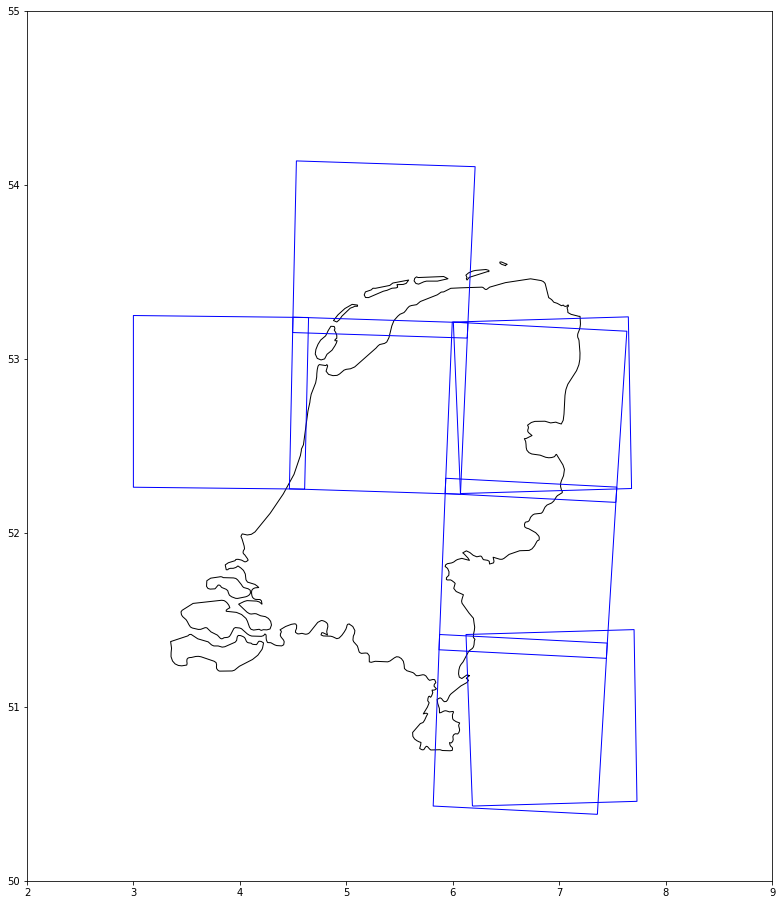

In [84]:

#Here we plot a map of the netherlands 
ax = gpd.read_file('geo_nl.json').plot(color='white', edgecolor='black',figsize=(16,16))
#If we wanted to plot all where cloudcoverpercentage is less than 25%, the ax parameter is used to plot the data on the same graph
df_geodata[df_geodata.cloudcoverpercentage < 25.0].plot(facecolor="none",edgecolor='blue', ax=ax)

#There are some out of bound points so
ax.set_xlim(2,9)
ax.set_ylim(50,55)
#df_geodata.plot(ax=ax, color='blue')

### At the beginning of the notebook we downloaded a dataset, lets find out a bit more about it

In [142]:
odata = api.get_product_odata('659851c9-6b5e-483f-97aa-972c3823abe2',full=True)
odata.keys()

dict_keys(['id', 'title', 'size', 'md5', 'date', 'footprint', 'url', 'Online', 'Creation Date', 'Ingestion Date', 'Acquisition Type', 'Carrier rocket', 'Cycle number', 'Date', 'Filename', 'Footprint', 'Format', 'Identifier', 'Instrument', 'Instrument abbreviation', 'Instrument description', 'Instrument description text', 'Instrument mode', 'Instrument name', 'Instrument swath', 'JTS footprint', 'Launch date', 'Mission datatake id', 'Mission type', 'Mode', 'NSSDC identifier', 'Operator', 'Orbit number (start)', 'Orbit number (stop)', 'Pass direction', 'Phase identifier', 'Polarisation', 'Product class', 'Product class description', 'Product composition', 'Product level', 'Product type', 'Relative orbit (start)', 'Relative orbit (stop)', 'Resolution', 'Satellite', 'Satellite description', 'Satellite name', 'Satellite number', 'Sensing start', 'Sensing stop', 'Size', 'Slice number', 'Start relative orbit number', 'Status', 'Stop relative orbit number', 'Timeliness Category', 'quicklook_ur

In [140]:
#Lets print select information about this product
ident_dict = {'Satellite':'Satellite name', 'Instrument':'Instrument name', 'Instrument description':'Instrument description text','Instrument mode':'Instrument mode', 'Instrument swath':'Instrument swath','Instrument resolution':'Resolution','Polarisation':'Polarisation','Product type':'Product type'}
for i in ident_dict:
    print('-{}:\n    {}\n'.format(i,odata[ident_dict[i]]))

-Satellite:
    Sentinel-1

-Instrument:
    Synthetic Aperture Radar (C-band)

-Instrument description:
    The SAR Antenna Subsystem (SAS) is developed and build by AstriumGmbH. It is a large foldable planar phased array antenna, which isformed by a centre panel and two antenna side wings. In deployedconfiguration the antenna has an overall aperture of 12.3 x 0.84 m.The antenna provides a fast electronic scanning capability inazimuth and elevation and is based on low loss and highly stablewaveguide radiators build in carbon fibre technology, which arealready successfully used by the TerraSAR-X radar imaging mission.The SAR Electronic Subsystem (SES) is developed and build byAstrium Ltd. It provides all radar control, IF/ RF signalgeneration and receive data handling functions for the SARInstrument. The fully redundant SES is based on a channelisedarchitecture with one transmit and two receive chains, providing amodular approach to the generation and reception of wide-bandsignals and 

(-36.0, -10.0)

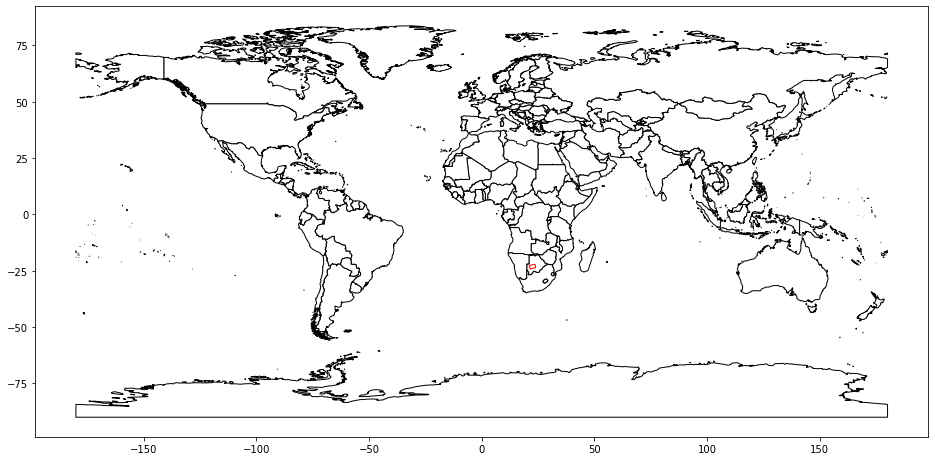

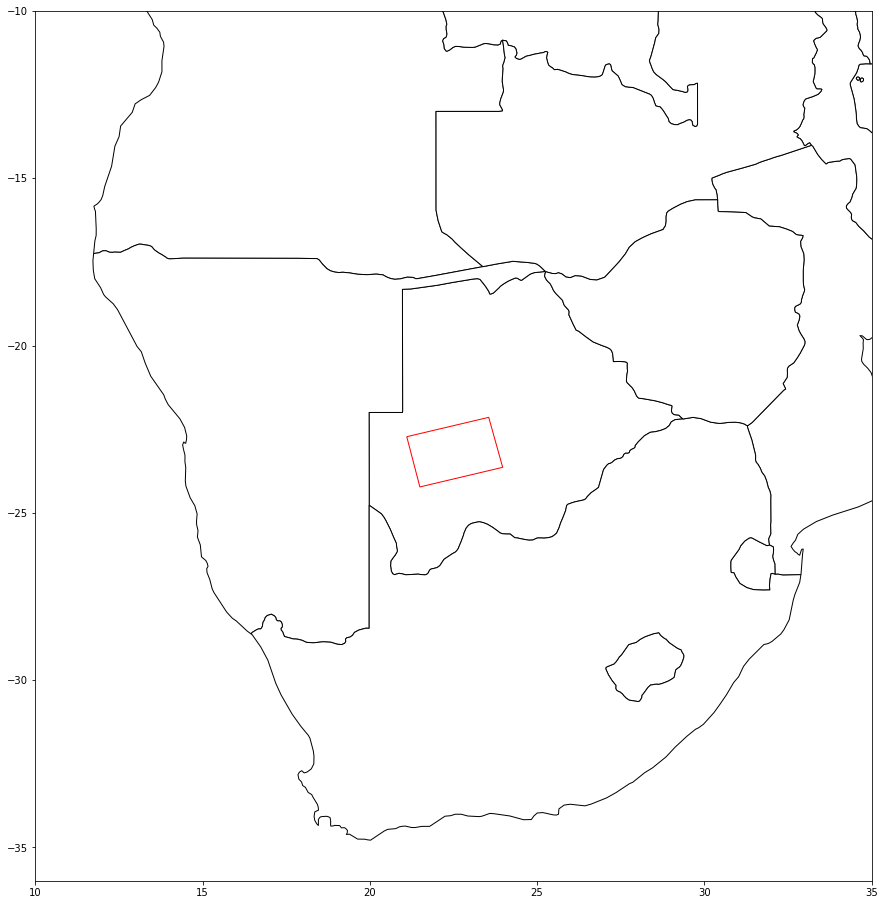

In [125]:
#Lets take look at the datas location
import shapely.wkt

#Here we plot a map of the world 
ax = gpd.read_file('world.geo.json').plot(color='white', edgecolor='black',figsize=(16,16))

# We have to turn the well-known Text (wkl) footprint into a shapely object which then gets loaded into a geodataframe to ease plotting
data_geometry = shapely.wkt.loads(odata["footprint"])
geoseries = gpd.GeoSeries({'geometry':data_geometry}).plot(ax=ax,facecolor="none",edgecolor='red')


#and a zoomed in version
ax2 = gpd.read_file('world.geo.json').plot(color='white', edgecolor='black',figsize=(16,16))
data_geometry = shapely.wkt.loads(odata["footprint"])
geoseries = gpd.GeoSeries({'geometry':data_geometry}).plot(ax=ax2,facecolor="none",edgecolor='red')
ax2.set_xlim(10,35)
ax2.set_ylim(-36,-10)

### Now that we know what the data actually is, let us inspect the data

After download the data is in zip format, so we need to unzip it, you can do this in python or just simply by oopening it with the relevant application

In [147]:
import zipfile

with zipfile.ZipFile(odata['Filename'].replace('.SAFE','.zip')) as z:
    z.extractall()

This will create a directory named after odata['Filename'], 
it contains 
- the manifest 
- a pdf containing the quality control report
- annotations folder containing the calibration data in xml format
- measurements folder containing the image data in tiff format
- preview folder containing a quick look image of the data and a map overlay file (kml google earth standard)
- support folder containing several xsd files


Now lets load the data, we will compare the vv and vh polarized data

### There are many options to load tiff files, we will be using Pillow the continuation of PIL the python image library
docs: https://pillow.readthedocs.io/en/stable/

In [156]:
from PIL import Image

#For file paths try to use os to avoid path issues
import os 

#Furthermore PIL has a size limit of 178956970 pixels which we first must increase
#PIL.Image.MAX_IMAGE_PIXELS = 933120000


vv = Image.open(os.path.join(odata['Filename'],'measurement','s1b-iw-grd-vv-20211004t170346-20211004t170411-028988-037598-001.tiff'))

vh = Image.open(os.path.join(odata['Filename'],'measurement','s1b-iw-grd-vh-20211004t170346-20211004t170411-028988-037598-002.tiff'))

In [158]:
# We can display the images:
vv.show()
vh.show()
# However, the chance is high that this will not render due to the size of the images

Segmentation fault (core dumped)
Segmentation fault (core dumped)


In [159]:
# And lastly if we want to create a numpy array containing the data
import numpy as np

vv_array = np.array(vv)
vh_array = np.array(vh)